In [113]:
import numpy as np
import pandas as pd

from kmodes.kprototypes import KPrototypes
pd.options.display.max_rows = 150
pd.options.display.max_columns = 150

In [114]:
df = pd.read_csv("data/data_merge.csv")

In [78]:
numerical_columns = [col for col in df.columns if df[col].dtype != "object"]

In [115]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', scaler, numerical_columns)
    ]
    , remainder="passthrough" 
)



In [116]:
catColumnsPos = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]

In [117]:

df_nor = df.copy()

In [68]:

# k = 5
# model = KPrototypes(n_clusters=k, init="Cao", verbose=2, n_jobs=-1, n_init=5, random_state=42)

# df_nor = df.copy()
# df_nor[numerical_columns] = preprocessor.fit_transform(df_nor[numerical_columns])
# model.fit_predict(df_nor, categorical = catColumnsPos)


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Starting iterations...
Starting iterations...
Starting iterations...
Starting iterations...
Starting iterations...
Run: 2, iteration: 1/100, moves: 24349, ncost: 1258938.1214548713
Run: 1, iteration: 1/100, moves: 46624, ncost: 1290881.0809277818
Run: 3, iteration: 1/100, moves: 36313, ncost: 1274093.9107476925
Run: 4, iteration: 1/100, moves: 25214, ncost: 1298396.4288500422
Run: 2, iteration: 2/100, moves: 11483, ncost: 1245080.555734567
Run: 5, iteration: 1/100, moves: 30314, ncost: 1291054.5546775043
Run: 1, iteration: 2/100, moves: 18796, ncost: 1270597.7349232654
Run: 3, iteration: 2/100, moves: 15827, ncost: 1254499.56811962

array([3, 3, 0, ..., 2, 4, 0], dtype=uint16)

In [69]:
# Add the cluster to the dataframe
df['Cluster Labels'] = model.labels_
df['Segment'] = df['Cluster Labels'].map({0:'First', 1:'Second', 2:'Third', 3:'Fourth', 4:'Fifth', 5:'Sixth', 6:'Seventh', 7:'Eighth', 
 8:'Ninth', 9:'Tenth', 10:'Eleventh', 11:'Twelfth', 12:'Thirteenth', 13:'Fourteenth', 14:'Fifteenth'}
)
# Order the cluster
df['Segment'] = df['Segment'].astype('category')
df['Segment'] = df['Segment'].cat.reorder_categories(['First','Second','Third', 'Fourth', 'Fifth']#, 'Sixth', 'Seventh', 'Eighth', 'Ninth', 'Tenth',  'Eleventh', 'Twelfth', 'Thirteenth', 'Fourteenth', 'Fifteenth'
)

In [162]:
df_nor['Cluster Labels'] = model.labels_
df_nor['Segment'] = df_nor['Cluster Labels'].map({0:'First', 1:'Second', 2:'Third', 3:'Fourth', 4:'Fifth', 5:'Sixth', 6:'Seventh', 7:'Eighth', 
 8:'Ninth', 9:'Tenth', 10:'Eleventh', 11:'Twelfth', 12:'Thirteenth', 13:'Fourteenth', 14:'Fifteenth'}
)
# Order the cluster
df_nor['Segment'] = df_nor['Segment'].astype('category')
df_nor['Segment'] = df_nor['Segment'].cat.reorder_categories(['First','Second','Third', 'Fourth', 'Fifth'])
df_nor['Segment']=df_nor['Segment'].astype('object')

In [163]:
df_nor

,customer_id,order_status,order_purchase_timestamp,review_score,length_comment_title,length_comment_message,payment_type,payment_installments,payment_value,nb_items,sum_price,sum_freight_value,customer_unique_id,customer_city,customer_state,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,Cluster Labels,Segment
0,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,4.0,0.0,170.0,"credit_card,voucher",1.0,38.71,1.0,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,268.0,4.0,500.0,19.0,8.0,13.0,housewares,3,Fourth
1,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,4.0,16.0,20.0,boleto,1.0,141.46,1.0,118.70,22.76,af07308b275d755c9edb36a90c618231,barreiras,BA,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,3,Fourth
2,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,5.0,0.0,0.0,credit_card,3.0,179.12,1.0,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,232.0,1.0,420.0,24.0,19.0,21.0,auto,0,First
3,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,5.0,0.0,105.0,credit_card,1.0,72.20,1.0,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop,0,First
4,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,5.0,0.0,0.0,credit_card,1.0,28.62,1.0,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,316.0,4.0,250.0,51.0,15.0,15.0,stationery,0,First
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99107,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,5.0,0.0,0.0,credit_card,3.0,85.08,1.0,72.00,13.08,6359f309b166b0196dbf7ad2ac62bb5a,sao jose dos campos,SP,1517.0,1.0,1175.0,22.0,13.0,18.0,health_beauty,0,First
99108,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,4.0,0.0,44.0,credit_card,3.0,195.00,1.0,174.90,20.10,da62f9e57a76d978d02ab5362c509660,praia grande,SP,828.0,4.0,4950.0,40.0,10.0,40.0,baby,2,Third
99109,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,5.0,0.0,28.0,credit_card,5.0,271.01,1.0,205.99,65.02,737520a9aad80b3fbbdad19b66b37b30,nova vicosa,BA,500.0,2.0,13300.0,32.0,90.0,22.0,home_appliances_2,2,Third
99110,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2.0,0.0,53.0,credit_card,4.0,441.16,2.0,359.98,81.18,5097a5312c8b157bb7be58ae360ef43c,japuiba,RJ,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories,4,Fifth


In [164]:
cat_columns = [col for col in df_nor.columns if df_nor[col].dtype == "object"]
cat_columns.remove("Segment")


In [134]:
num_columns = [col for col in df_nor.columns if df_nor[col].dtype != "object"]

num_columns.remove("Cluster Labels")

In [136]:
num_columns

['review_score',
 'length_comment_title',
 'length_comment_message',
 'payment_installments',
 'payment_value',
 'nb_items',
 'sum_price',
 'sum_freight_value',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm']

In [147]:
from sklearn.preprocessing import  StandardScaler,OneHotEncoder
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.pipeline import Pipeline

std = StandardScaler(with_mean=False)
ohe= OneHotEncoder(handle_unknown="ignore")

preprocessor_pca = ColumnTransformer(
    transformers=[
        
        ("ohe",ohe,cat_columns)
    ]
    
)
pca=Pipeline([
     ('preprocessor', preprocessor_pca),
     ('std', std ),
     ("svd", TruncatedSVD(n_components=2,random_state=42))
])
# Choisir le nb de composants
pca_value = pca.fit_transform(df_nor[num_columns+cat_columns])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

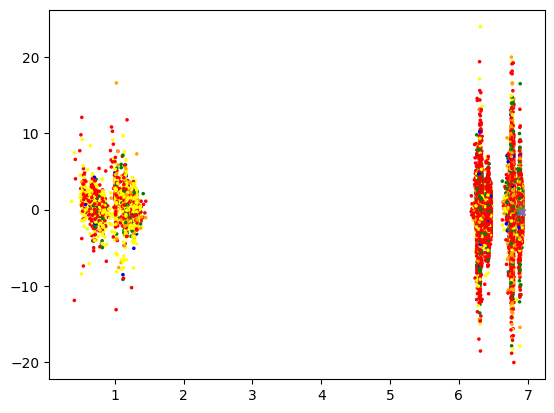

In [190]:
import matplotlib.pyplot as plt
color_map = {'First': 'red', 'Second': 'blue', 'Third': 'green', "Fourth":"yellow", "Fifth":"orange"}
colors = np.array([color_map[x] for x in df_nor['Segment']])

plt.scatter(pca_value[:,0],pca_value[:,1],c=colors,marker=".",s=10)
for center in pca.transform(pd.DataFrame(model.cluster_centroids_,columns=df[num_columns+cat_columns].columns)):
    plt.scatter(center[0],center[1],marker='x',s=20)